# Homework 1

Please find two pictures with resolution 512x512 pixel:  
1. One contains only a single English letter or a Chinese word;  
2. The other is a nature scene picture.

Implement two works below :  
1. Image rotated 30 degrees clockwise using nearest neighbor interpolation;  
2. Image rotated 30 degrees clockwise using bilinear interpolation.

In [1]:
import cv2 as cv
from math import sin, cos, radians, ceil, floor
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#計算新影像的邊長
h = round(512 * (sin(radians(30)) + sin(radians(60))))

In [3]:
#旋轉矩陣
affine_matrix = [[cos(radians(-30)), -sin(radians(-30))],
                 [sin(radians(-30)), cos(radians(-30))]]
inv_matrix = np.linalg.inv(affine_matrix)

In [4]:
#nearest neighbor rotate
def nearest_neighbor(img):
    img_rotate = np.zeros((h, h, 3), dtype=img.dtype) #先建立好輸出的圖像
    for x in range(h):
        for y in range(h):
            #矩陣乘法
            x_bar = round(float(inv_matrix[0][0] * x + inv_matrix[0][1] * (y-256)))
            y_bar = round(float(inv_matrix[1][0] * x + inv_matrix[1][1] * (y-256)))

            #若是找到的座標有落在原圖內
            if x_bar >= 0 and y_bar >= 0 and x_bar < 512 and y_bar < 512:
                img_rotate[x][y] = img[x_bar][y_bar]
    return img_rotate

In [5]:
#bilinear interpolation
def bilinear(img):
    img_rotate = np.zeros((h, h, 3), dtype=img.dtype) #先建立好輸出的圖像
    for x in range(h):
        for y in range(h):
            x_bar = inv_matrix[0][0] * x + inv_matrix[0][1] * (y-256)
            y_bar = inv_matrix[1][0] * x + inv_matrix[1][1] * (y-256)

            #若是找到的座標有落在原圖內
            if x_bar >= 0 and y_bar >= 0 and x_bar <= 511 and y_bar <= 511:
                x1, x2, y1, y2 = floor(x_bar), ceil(x_bar), floor(y_bar), ceil(y_bar)
                f_r1 = (x2 - x_bar) * img[x1][y1] + (x_bar - x1) * img[x2][y1]
                f_r2 = (x2 - x_bar) * img[x1][y2] + (x_bar - x1) * img[x2][y2]
                img_rotate[x][y] = (y2 - y_bar) * f_r1 + (y_bar - y1) * f_r2
    return img_rotate

In [6]:
#顯示影像
def show_result(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [7]:
#影像處理
def  rotate(img_name):
    img = cv.imread(img_name)
    show_result(img)
    img1 = nearest_neighbor(img)
    img2 = bilinear(img)
    show_result(img1)
    show_result(img2)

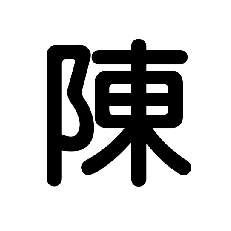

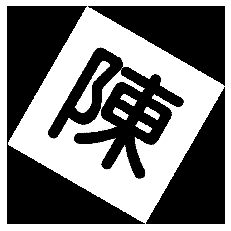

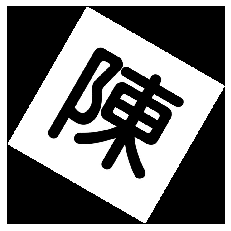

In [8]:
rotate('01.jpg')

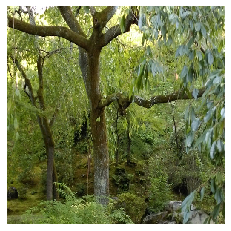

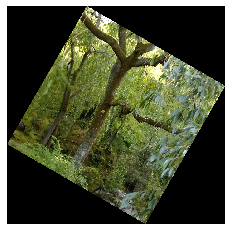

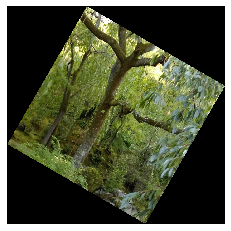

In [9]:
rotate('02.jpg')